# **Titanic Disaster Survival Prediction System**


# **About Titanic Disaster:**
Around 1,500 passengers and crew members perished when the British luxury passenger liner **Titanic** sank on April 14–15, 1912, while on her first journey from *Southampton, England,* to *New York City.* It is one of the most well-known tragedies in contemporary history, and it has sparked many literary works, motion pictures, musicals, and scientific theories.

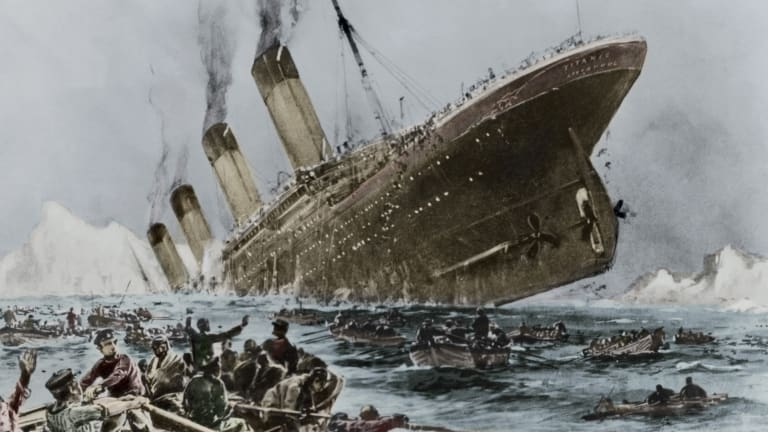

# **Challenge:**
The objective of this competition is to learn from a given trained data set to predict who would survive or perish in the Titanic disaster. In essence, we will create our own Machine Learning (ML) model that, using the provided trained data, will automatically predict the passenger survivability.

# **Submission Details:**
Blog: [titanic_disaster_survival_prediction_system](https://medium.com/@bolajkiran_89403/titanic-disaster-survival-prediction-system-12d3dae61397)

# **Dataset Used:**
Two data sets are provided to us for this competition: the trained dataset (`train.csv`) and the test dataset (`test.csv`). The earlier one is used to train our ML model, and the later one is used to test it.
> **Description of Headers:**
> 1. **```PassengerId```:** Ids from 1 to 891 to uniquely identify each passenger. 
> 2. **```Survived```:** Enumerated values, either 1-survived and 0-Died (missing this column in ```test.csv``` which our ML model will predict)
> 3. **```Pclass```:** Passenger class
> 4. **```Name```:** Name of the Passenger
> 5. **```Sex```:** Enumerated values {male - 65%, female - 35%} identies gender of a passenger.
> 6. **```Age```:** Age of passenger (0.42 to 80 years)
> 7. **```SibSp```:** Number indicating Sibling or Spouse of the passenger on to the ship (0 to 8)
> 8. **```Parch```:** Number indicating Parent or Children of the passenger (0 to 6)
> 9. **```Ticket```:** Ticket number of the passenger
> 10. **```Fare```:** Cost of the ticket.
> 11. **```Cabin```:** Cabin of the passenger stay. Values include - null, G6 and others
> 10. **```Embarked```:** Ship port where passenger boarded. This has enumerated values as S, C, Q indicating Southampton, Cherbourg and Queenstoown respectively.


Our output dataset should have to headers in CSV file: 
(Example was given in ```gender_submission.csv``` using RandomForestClassifier)

> 1. **```PassengerId```:** Ids from 1 to 891 to uniquely identify each passenger. 
> 2. **```Survived```:** Enumerated values, either 1-survived and 0-Died (missing this column in ```test.csv``` which our ML model will predict)


# **First Submission: RandomBasedClassifier**
This submission is done by following the kaggle titanic tutorial: https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

**`Original Score: 0.77511`**:

> **Pre-requisite: Mount the Gdrive:**

In [ ]:
# Code for mounting your Gdrive

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive



> **Step 1: Get the input dataset**




In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/titanic/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

> **Step 2: Load the data**

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Below are the details that tells us the percentage of female passengers who survived.

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


Below are the details that tells us the percentage of male passengers who survived.

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


From above, we can make out that the survival rate of female passengers is more as compared to male passengers.

Now using RandomForestClassifier, we can predict the survivability of passengers in test data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/content/drive/MyDrive/titanic/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# **Contribution: RandomForestClassifier**
Let us examine all the unique values for each of the features given in trained data.


In [ ]:
# Print all unique values for each of the features
pclass = test_data['Pclass'].unique()
print(pclass)
sibsp = test_data['SibSp'].unique()
print(sibsp)
embarked = test_data['Embarked'].unique()
print(embarked)
parch = test_data['Parch'].unique()
print(parch)
cabin = test_data['Cabin'].unique()
print(cabin)
fare = test_data['Fare'].unique()
print(max(fare))

[3 2 1]
[0 1 2 3 4 5 8]
['Q' 'S' 'C']
[0 1 3 2 4 6 5 9]
[nan 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A21' 'C78' 'D34' 'D19' 'A9'
 'D15' 'C31' 'C23 C25 C27' 'F G63' 'B61' 'C53' 'D43' 'C130' 'C132' 'C101'
 'C55 C57' 'B71' 'C46' 'C116' 'F' 'A29' 'G6' 'C6' 'C28' 'C51' 'E46' 'C54'
 'C97' 'D22' 'B10' 'F4' 'E45' 'E52' 'D30' 'B58 B60' 'E34' 'C62 C64' 'A11'
 'B11' 'C80' 'F33' 'C85' 'D37' 'C86' 'D21' 'C89' 'F E46' 'A34' 'D' 'B26'
 'C22 C26' 'B69' 'C32' 'B78' 'F E57' 'F2' 'A18' 'C106' 'B51 B53 B55'
 'D10 D12' 'E60' 'E50' 'E39 E41' 'B52 B54 B56' 'C39' 'B24' 'D28' 'B41'
 'C7' 'D40' 'D38' 'C105']
512.3292


**Visualizing using bar graph:**

[233.0, 81.0]
[60.0, 254.0]


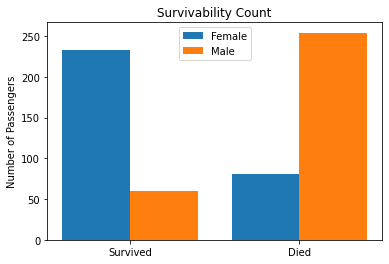

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# Labels on X-axis
X = ['Survived','Died']

#Total Number of passengers boarded
total_passengers = len(train_data.index)
# Segregate female passengers
total_female_passengers = (train_data['Sex'] == 'female').sum()
# Segregate male passengers
total_male_passengers = (train_data['Sex'] == 'female').sum()

# Get count of female passengers who survived
female_passengers_count_survived = np.ceil(rate_women * total_female_passengers)
# Get count of female passengers who died
female_passengers_count_died = np.ceil(total_female_passengers - female_passengers_count_survived)

# Get count of male passengers who survived
male_passengers_count_survived = np.ceil(rate_men * total_male_passengers)
# Get count of male passengers who died
male_passengers_count_died = np.ceil(total_male_passengers - male_passengers_count_survived)

female = [female_passengers_count_survived, female_passengers_count_died]
print(female)

male = [male_passengers_count_survived, male_passengers_count_died]
print(male)
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, female, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male, 0.4, label = 'Male')
  
plt.xticks(X_axis, X)
plt.ylabel("Number of Passengers")
plt.title("Survivability Count")
plt.legend()
plt.show()

**Visualizing using Pie chart:**

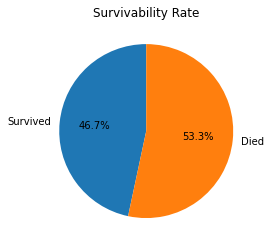

In [ ]:
import matplotlib.pyplot as plt
 
#Get count of survived passengers
survived_count = female_passengers_count_survived + male_passengers_count_survived

#Get count of died passengers
died_count = female_passengers_count_died + male_passengers_count_died
data = [survived_count, died_count]
label = ['Survived', 'Died']
 
plt.pie(data, labels=label, autopct='%1.1f%%', explode=None, shadow=False, startangle=90)
plt.title('Survivability Rate')
plt.show()

From above we can make out that, there are other lot many features that need to be examined. And we will do one by one.



# **Pre-processing/Cleaning up the data:**



Let us first clean up the data, by figuring out all the empty values (NaN values) which does not contribute to the development of our prediction model.

In [ ]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now let us analyse the data. From trained data we can say that the headers/columns which are not important for predicting the survival rate are 'Name' and 'Cabin'. Hence we drop them. 

Also eliminate all the NaN values which will not contribute in our developing survival prediction model.

In [ ]:
# Drop Name and Cabin which are uniquely defined for passengers and are irrelevant for our analysis.
train_data = train_data.drop(columns=['Name','Cabin'])
test_data = test_data.drop(columns=['Name','Cabin'])

# Eliminate NaN values by filling 0
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)



In [ ]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we don't see any NaN values. But we should have some values substituted for the **Age** and **Embarked** column values which has 0 that was replaced NaN.

For features like 'Age' and 'Embarked', let us fill their 0th values with their mean and total counts respectively.

In [ ]:
# Get counts of Embarked
embarked_counts = train_data['Embarked'].value_counts()
# Get mean value of the ages of the passengers
age_mean = train_data['Age'].mean()

# clean up the NaN values for both trained and test data
train_data['Embarked'] = train_data['Embarked'].fillna(embarked_counts)
train_data['Age'] = train_data['Age'].fillna(age_mean)

test_data['Embarked'] = test_data['Embarked'].fillna(embarked_counts)
test_data['Age'] = test_data['Age'].fillna(age_mean)
    


Now for the string enumerated values, map the natural numbers to lexiographical order of 'Embarked' values.
And for 'Age' map 1 and 2 for 'male' and 'female' values respectively.

In [ ]:
# Map gender descrimination with the natural numbers
gender_mapping = {'male': 1, 'female': 2}
train_data = train_data.applymap(lambda s: gender_mapping.get(s) if s in gender_mapping else s)
test_data = test_data.applymap(lambda s: gender_mapping.get(s) if s in gender_mapping else s)

# Map port at which the passengers boarded with natural numbers
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}
train_data = train_data.applymap(lambda s: embarked_mapping.get(s) if s in embarked_mapping else s)
test_data = test_data.applymap(lambda s: embarked_mapping.get(s) if s in embarked_mapping else s)
print(train_data['Embarked'].unique())
print(train_data['Pclass'].unique())

[3 1 2 0]
[3 1 2]


We will use the RandomForestClassifier to predict the survivability.
Steps followed:
- Merge the 'SibSp' and 'Parch' values as 'Family_Group' that boarded the ship.
- We will divide this merged value by total family groups.
- Next we will merge the 'Pclass' and 'Embarked' since, we want to have a common header that will have both values merged.
- For features we will add all our additional columns created as new attributes that will contribute to the prediction model.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

# Find group of family that are travelling in ship
test_data["Family_Group"] = ((test_data['SibSp'] + test_data['Parch'] + 1))
train_data["Family_Group"] = ((train_data['SibSp'] + train_data['Parch'] + 1))

# Avg. for family group for new attribute that will contribute the model.
test_data["Family_Group_Avg"] = (test_data["Family_Group"]/test_data["Family_Group"].value_counts()).round(2)
test_data["Family_Group_Avg"] = test_data["Family_Group_Avg"].fillna(test_data["Family_Group"].mean().round(2), inplace=True)

train_data["Family_Group_Avg"] = (train_data["Family_Group"]/train_data["Family_Group"].value_counts()).round(2)
train_data["Family_Group_Avg"] = train_data["Family_Group_Avg"].fillna(train_data["Family_Group"].mean().round(2), inplace=True)

# Merge the Pclass and Embarked so that both have cummulative contribution towards our model.
test_data["ClassBoard"] = (test_data['Pclass'] + test_data['Embarked']/2)
train_data["ClassBoard"] = (train_data['Pclass'] + train_data['Embarked']/2)

features = ["ClassBoard", "Pclass", "Sex", "Family_Group_Avg", "Family_Group", "Age", "Fare", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Applying RandomForestClassification
model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=69)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/content/drive/MyDrive/titanic/submission992.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


**After submitting the above file in Kaggle Titanic competition, the new improved score I received is - 0.78468**